In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<h1>Loading the data

In [2]:
train_data = pd.read_csv('UCI_HAR_Dataset/csv_files/X_train.csv')
test_data = pd.read_csv('UCI_HAR_Dataset/csv_files/X_test.csv')

<h1>Writing functions we will use to train and test models

In [192]:
def train_test_model(model,train_data,test_data):
    
    final_results={}
    print("=====================")
    print("Training the model...")
    print("=====================")
    
    #Fitting the model
    clf = model.fit(train_data.iloc[:,0:561],train_data['activity'])
    
    print("Training done!")
    print(" ")
    
    #adding cv_result to final_results
    final_results['cv_results'] = clf.cv_results_
    
    #adding best_parameter_result to final_results
    final_results['best_parameter'] = clf.best_params_

    #Predicting the labels
    train_prediction = clf.predict(train_data.iloc[:,0:561])
    
    #adding train_prediction
    final_results['train_prediction'] = train_prediction
    
    train_accuracy = accuracy_score(y_pred=train_prediction, y_true=train_data['activity'])
    final_results['train_accuracy']= train_accuracy
    
    print("=================")
    print("Testing the model")
    print("=================")
    print(" ")
    
    #Prediction of test data
    test_prediction = clf.predict(test_data.iloc[:,0:561])
    
    final_results['test_prediction'] = test_prediction
    
    print("Testing done!")
    
    #Calculating the test accuracy of model
    test_accuracy = accuracy_score(y_pred=test_prediction, y_true=test_data['activity'])
    
    final_results['test_accuracy']=test_accuracy
    
    #Computing the confusion matrix
    cm=confusion_matrix(test_data.loc[:,'activity'],test_prediction)
    
    final_results['confusion_matrix']=cm
    
    return final_results
    

In [275]:
def viewing_performance(final_results,cmap='viridis',show_cm_in_percentage=True):
    
    print("The best parameter for our model is ",final_results['best_parameter'])
    
    print("The accuracy of model is :",final_results['test_accuracy'])
    
    print("=================================")
    print("The confusion matrix of our model")
    print("=================================")
    
    axis_label = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING', 'STANDING','LAYING']
    fig,ax = plt.subplots()
    ax.set_title("Confusion Matrix")
    
    if show_cm_in_percentage:
        values = final_results['confusion_matrix']/final_results['confusion_matrix'].sum(axis=1)
    else:
        values = final_results['confusion_matrix']
    
    sns.heatmap(data=values,cmap=cmap,annot=True,xticklabels=axis_label,yticklabels=axis_label,ax=ax)    
    plt.show()
    print(" ")
    #print("Printing the train and test loss")
    #print(" ")
    #print("The test loss is : ",final_results['test_loss'])
    #print("The train loss is : ",final_results['train_loss'])
    #print(" ")
    print("Checking test and train accuracy to determine overfitting and underfitting")
    print(" ")
    print("The train accuracy is :",final_results['train_accuracy'])
    print("The test accuracy is :",final_results['test_accuracy'])
        

<h1>Logistic regression model

In [181]:
log_reg = LogisticRegression(solver='liblinear',max_iter=3000,verbose=0)
param_grid = {'C':[0.01, 0.1, 1, 20],'penalty':['l2','l1']}
clf = GridSearchCV(estimator=log_reg,param_grid=param_grid,cv=3)

#training and testing the model
final_results = train_test_model(clf,train_data,test_data)

Training the model...
Training done!
 
Testing the model
 
Testing done!


In [223]:
np.save('log_reg_results.npy',final_results)

The best parameter for our model is  {'C': 20, 'penalty': 'l2'}
The accuracy of model is : 0.9616559212758737
The confusion matrix of our model


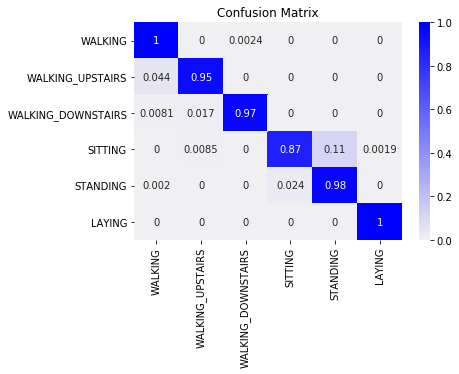

 
Checking test and train accuracy to determine overfitting and underfitting
 
The train accuracy is : 0.9959194776931447
The test accuracy is : 0.9616559212758737


In [274]:
viewing_performance(final_results,cmap=sns.color_palette("light:b", as_cmap=True),show_cm_in_percentage=True)

#Conclusion : our model maybe overfitting, or the variance of our model is high
#As expected we have more confusion happening between STANDING AND SITTING

<h1>Linear SVM</h1>
<ul>
    <li>Check which is the support vector in out data</li>
    <li>Plot the decision boundry of SVm</li>

In [218]:
l_svm = LinearSVC(max_iter=10000,tol=0.0001)

param_grid = {'C':[0.125, 0.5, 1, 2, 8, 16]}
clf_lsvm = GridSearchCV(estimator=l_svm, param_grid=param_grid,cv=3)

In [219]:
final_results_lsvm = train_test_model(clf_lsvm,train_data,test_data)

Training the model...


C:\Users\SOURAV\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SOURAV\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SOURAV\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SOURAV\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\SOURAV\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Training done!
 
Testing the model
 
Testing done!


C:\Users\SOURAV\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [224]:
np.save('l_svm_results.npy',final_results_lsvm)

The best parameter for our model is  {'C': 1}
The accuracy of model is : 0.9647098744485918
The confusion matrix of our model


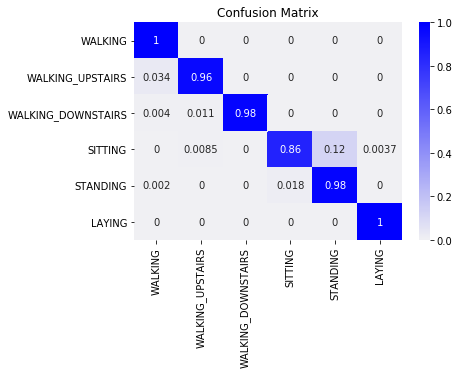

 
Checking test and train accuracy to determine overfitting and underfitting
 
The train accuracy is : 0.9949673558215452
The test accuracy is : 0.9647098744485918


In [217]:
viewing_performance(final_results_lsvm,cmap=sns.color_palette("light:b", as_cmap=True),show_cm_in_percentage=True)

<h1>SVM using rbf kernel</h1>

In [220]:
k_svm = SVC(kernel='rbf')
param_grid = {'C':[0.125, 0.5, 2, 12, 20,30]}
clf_ksvm= GridSearchCV(estimator=k_svm, param_grid=param_grid,cv=3)

In [221]:
final_results_ksvm = train_test_model(clf_ksvm,train_data,test_data)

Training the model...
Training done!
 
Testing the model
 
Testing done!


In [225]:
#Saving the results
np.save('k_svm_results.npy',final_results_ksvm)

The best parameter for our model is  {'C': 30}
The accuracy of model is : 0.9630132337970818
The confusion matrix of our model


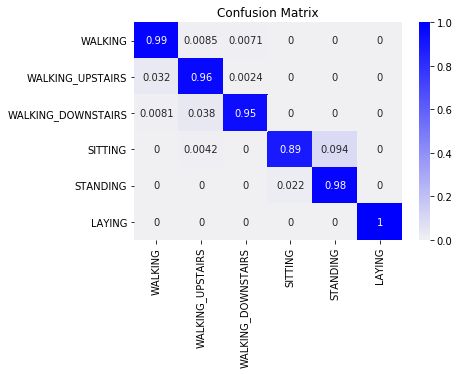

 
Checking test and train accuracy to determine overfitting and underfitting
 
The train accuracy is : 0.9972796517954298
The test accuracy is : 0.9630132337970818


In [222]:
viewing_performance(final_results_ksvm,cmap=sns.color_palette("light:b", as_cmap=True),show_cm_in_percentage=True)

In [227]:
final_results_ksvm['cv_results']

{'mean_fit_time': array([7.00177765, 3.86233449, 2.40258781, 1.79684925, 1.71906869,
        1.7154247 ]),
 'std_fit_time': array([0.34487271, 0.07736258, 0.05509693, 0.0626795 , 0.05237313,
        0.08533298]),
 'mean_score_time': array([6.75059795, 3.9876821 , 2.60801053, 1.74400083, 1.6219945 ,
        1.63860504]),
 'std_score_time': array([0.43252195, 0.12270526, 0.08771416, 0.14241164, 0.10783822,
        0.16891705]),
 'param_C': masked_array(data=[0.125, 0.5, 2, 12, 20, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.125},
  {'C': 0.5},
  {'C': 2},
  {'C': 12},
  {'C': 20},
  {'C': 30}],
 'split0_test_score': array([0.90412077, 0.93064055, 0.94247246, 0.94451244, 0.94410445,
        0.94492044]),
 'split1_test_score': array([0.87148103, 0.89188086, 0.91472868, 0.93023256, 0.93268054,
        0.93349653]),
 'split2_test_score': array([0.89591837, 0.93428571, 0.95183673, 0.95755102, 0.957

<h1>Building a decision Tree</h1>

In [230]:
parameters = {'max_depth':np.arange(3,10,2),'criterion':['gini','entropy']}
dt = DecisionTreeClassifier()
dt_tree = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)

In [233]:
final_results_dt = train_test_model(dt_tree,train_data,test_data)

Training the model...
Training done!
 
Testing the model
 
Testing done!


In [236]:
np.save('dt_results.npy',final_results_dt)

The best parameter for our model is  {'criterion': 'entropy', 'max_depth': 5}
The accuracy of model is : 0.8551068883610451
The confusion matrix of our model


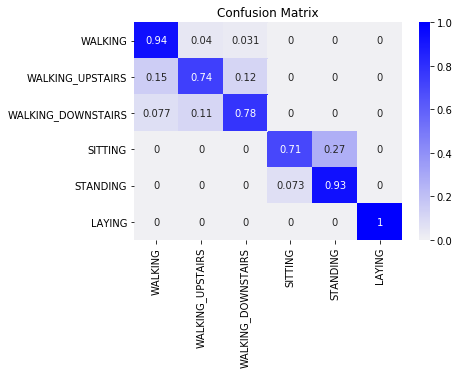

 
Checking test and train accuracy to determine overfitting and underfitting
 
The train accuracy is : 0.9255984766050055
The test accuracy is : 0.8551068883610451


In [234]:
viewing_performance(final_results_dt,cmap=sns.color_palette("light:b", as_cmap=True),show_cm_in_percentage=True)

<h1>Random forest classifier</h1>

In [237]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

In [238]:
final_results_rf = train_test_model(rfc_grid,train_data,test_data)

Training the model...
Training done!
 
Testing the model
 
Testing done!


In [263]:
#Saving the results
np.save('rf_results.npy',final_results_rf)

The best parameter for our model is  {'max_depth': 13, 'n_estimators': 70}
The accuracy of model is : 0.9205972175093315
The confusion matrix of our model


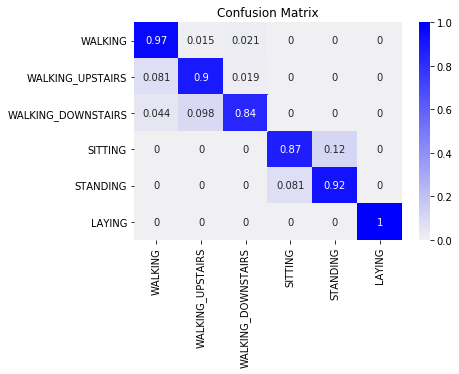

 
Checking test and train accuracy to determine overfitting and underfitting
 
The train accuracy is : 0.999455930359086
The test accuracy is : 0.9205972175093315


In [239]:
viewing_performance(final_results_rf,cmap=sns.color_palette("light:b", as_cmap=True),show_cm_in_percentage=True)

<h1>Comparing all the models

In [262]:
print("Model  | Accuracy                   | Error ")
print("-"*57)
print("LR     | {}         | {}".format(final_results['test_accuracy'],1-final_results['test_accuracy']))
print("L-SVM  | {}         | {}".format(final_results_lsvm['test_accuracy'],1-final_results_lsvm['test_accuracy']))
print("RBF-SVM| {}         | {}".format(final_results_ksvm['test_accuracy'],1-final_results_ksvm['test_accuracy']))
print("DT     | {}         | {}".format(final_results_dt['test_accuracy'],1-final_results_dt['test_accuracy']))
print("RF     | {}         | {}".format(final_results_rf['test_accuracy'],1-final_results_rf['test_accuracy']))

Model  | Accuracy                   | Error 
---------------------------------------------------------
LR     | 0.9616559212758737         | 0.03834407872412626
L-SVM  | 0.9664065151001018         | 0.03359348489989822
RBF-SVM| 0.8537495758398371         | 0.14625042416016287
DT     | 0.8551068883610451         | 0.1448931116389549
RF     | 0.9205972175093315         | 0.07940278249066846


<b>Conclusion : We can use LR or Linear SVM model